In [1]:
import architecture
import data_setup
import engine
import os 
import torch

/Users/lam.nguyen/Desktop/GithubClone/TI_Final/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Visualisation

In [221]:
loss_func_test = torch.nn.L1Loss()
hidden_size = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [222]:
lstm = architecture.LSTM_model(input_size=6,
                               hidden_size=hidden_size,
                               output_shape=1).to(device)

transformerlstm = architecture.TransformerLSTM_model(input_size=6,
                                                     hidden_size=hidden_size,
                                                     output_shape=1).to(device)


transformergru = architecture.TransformerGRU_model(input_size=6,
                                                         hidden_size=hidden_size,
                                                         output_shape=1).to(device)


In [223]:
files_train = []
files_test = []
ind = 0
for f in os.listdir(os.path.join("..", "Data", "train")):
    files_train.append(f)

for f in os.listdir(os.path.join("..", "Data", "test")):
    files_test.append(f)
files_train.sort()
files_test.sort()
file2train = files_train[ind]
file2test = files_test[ind]

In [224]:
code = file2test[:3]
code

'CTG'

In [225]:
file2test

'CTG_data2_test.csv'

In [226]:
train_dataloader, test_dataloader = data_setup.create_dataloaders(train_path=os.path.join("..", "Data", "train", file2train),
                                                                  test_path=os.path.join("..", "Data", "test", file2test),
                                                                  target_col='close',
                                                                  batch_size=16)

In [227]:
lstm.load_state_dict(torch.load(os.path.join("..", "model", "LSTM", "LSTM_" + code + "128_16_0001"), 
                                map_location=torch.device('cpu')))

transformerlstm.load_state_dict(torch.load(os.path.join("..", "model", "TransformerLSTM", "TransformerLSTM_" + code + "128_16_0001"),
                                           map_location=torch.device('cpu')))

transformergru.load_state_dict(torch.load(os.path.join("..", "model", "TransformerGRU", "Transformer-GRU_" + code + "128_16_0001"),
map_location=torch.device('cpu')))

<All keys matched successfully>

In [228]:
lstm_results = engine.test_step(model=lstm,
                                dataloader=test_dataloader,
                                loss_func=loss_func_test,
                                device=device)

transformerlstm_results = engine.test_step(model=transformerlstm, 
                                           dataloader=test_dataloader, 
                                           loss_func=loss_func_test, 
                                           device=device)

transformergru_results = engine.test_step(model=transformergru,
                                          dataloader=test_dataloader,
                                          loss_func=loss_func_test,
                                          device=device)

In [229]:
# lstm_pred = torch.cat(lstm_results[0], -1).clone().detach()
# transformerlstm_pred = torch.cat(transformerlstm_results[0], -1).clone().detach()
# transformergru_pred = torch.cat(transformergru_results[0], -1).clone().detach()

In [230]:
# import pandas as pd
# trueprice = torch.tensor(pd.read_csv(os.path.join("..", "Data", "test", file2test))["close"][1:].to_numpy())

In [231]:
# from torcheval.metrics import R2Score
# metric = R2Score()
# metric.update(lstm_pred, trueprice)
# print(f"R2 of LSTM on {code}:", round(metric.compute().item(),4))

# metric = R2Score()
# metric.update(transformerlstm_pred, trueprice)
# print(f"R2 of TransformerLSTM on {code}:", round(metric.compute().item(),4))

# metric = R2Score()
# metric.update(transformergru_pred, trueprice)
# print(f"R2 of TransformerGRU on {code}:", round(metric.compute().item(),4))

In [232]:
# import pandas as pd
# import os
# lstm_traindata = pd.read_csv(os.path.join("..", "log_df", "LSTM", "LSTM_CTG128_16_0001.csv")).rename({"Unnamed: 0": "Epoch"}, axis=1)
# transformerlstm_traindata = pd.read_csv(os.path.join("..", "log_df", "TransformerLSTM", "TransformerLSTM_CTG128_16_0001.csv")).rename({"Unnamed: 0": "Epoch"}, axis=1)
# transformergru_traindata = pd.read_csv(os.path.join("..", "log_df", "TransformerGRU", "Transformer-GRU_CTG128_16_0001.csv")).rename({"Unnamed: 0": "Epoch"},axis=1)

In [233]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set a style for the plot
# sns.set(style="dark")

# # Create a figure and axis with higher DPI
# plt.figure(figsize=(12, 8), dpi=1200)  # Increased DPI for higher resolution

# # Plotting the loss for each model with different styles and increased line width
# plt.plot(lstm_traindata['Epoch'], lstm_traindata['train_loss'], label='LSTM Loss', color='b', linewidth=2.5)
# plt.plot(transformerlstm_traindata['Epoch'], transformerlstm_traindata['train_loss'], label='Transformer-LSTM Loss', color='g', linewidth=2.5)
# plt.plot(transformergru_traindata['Epoch'], transformergru_traindata['train_loss'], label='Transformer-GRU Loss', color='r', linewidth=2.5)

# # Adding labels and title with enhanced font sizes
# plt.xlabel('Epoch', fontsize=14)
# plt.ylabel('Loss', fontsize=14)
# plt.title('Training Loss Comparison', fontsize=16, fontweight='bold')

# # Adding a legend with a shadow effect
# plt.legend(loc='upper right', fontsize=12)

# # Adding grid lines for better readability
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# # Adding a tight layout to ensure everything fits well
# plt.tight_layout()

# # Save the plot in high resolution
# plt.savefig(fname=os.path.join("..",'training_loss_comparison.png'), 
#             dpi=1200,              # High DPI for quality
#             bbox_inches='tight',  # Removes extra white spaces
#             pad_inches=0.1,       # Adds small padding
#             format='png')         # Can also use 'pdf', 'svg', etc.

# # Show the plot
# plt.show()

In [234]:
import numpy as np
import pandas as pd
import os

lstm_pred = torch.cat(lstm_results[0], -1).numpy()
transformerlstm_pred = torch.cat(transformerlstm_results[0], -1).numpy()
transformergru_pred = torch.cat(transformergru_results[0], -1).numpy()

trueprice = pd.read_csv(os.path.join("..", "Data", "test", file2test))["close"][1:]


In [235]:
file2test

'CTG_data2_test.csv'

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a style for the plot
sns.set(style="dark")

# Create a figure and axis with high DPI
plt.figure(figsize=(12, 8), dpi=1200)  # High DPI for better resolution

# Time
time = np.arange(0, len(trueprice), 1)

# Plotting with enhanced styling
plt.plot(time, trueprice, label="Stock Price", color='k', linewidth=2)
plt.plot(time, lstm_pred, label='LSTM', color='b', linewidth=1.5)
plt.plot(time, transformerlstm_pred, label='Transformer-LSTM', color='g', linewidth=1.5)
plt.plot(time, transformergru_pred, label='Transformer-GRU', color='r', linewidth=1.5)

# Adding labels and title with enhanced font sizes
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title('Stock Price Prediction', fontsize=16, fontweight='bold')

# Adding a legend with enhanced styling
plt.legend(loc='upper right', fontsize=12)

# Adding grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a tight layout to ensure everything fits well
plt.tight_layout()

# Save the plot in high resolution
plt.savefig(fname=os.path.join("..",'stock_price_prediction.png'),    # File name
            dpi=1200,                         # High DPI for quality
            bbox_inches='tight',             # Removes extra white spaces
            pad_inches=0.1,                  # Adds small padding
            format='png')                    # File format


# Show the plot
plt.show()

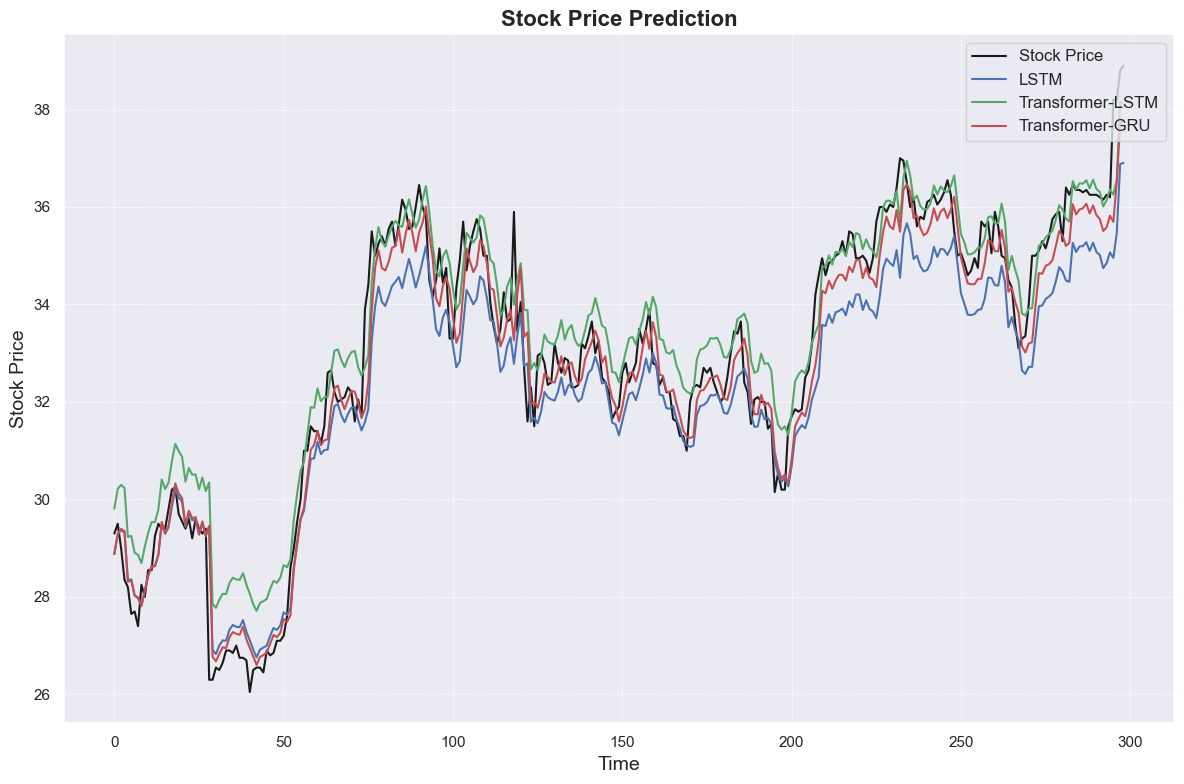

In [237]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set a style for the plot
# sns.set(style="dark")

# # Create a figure and axis
# plt.figure(figsize=(12, 8))

# # Time
# time = np.arange(0, len(trueprice), 1)
# # Plotting the loss for each model with different styles and increased line width
# plt.plot(time, trueprice, label = "Stock Price", color='k')
# plt.plot(time, lstm_pred, label='LSTM', color='b', linewidth=1.5)
# plt.plot(time, transformerlstm_pred, label='Transformer-LSTM', color='g', linewidth=1.5)
# plt.plot(time, transformergru_pred, label='Transformer-GRU', color='r', linewidth=1.5)

# # Adding labels and title with enhanced font sizes
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Stock Price', fontsize=14)
# plt.title('Stock Price Prediction', fontsize=16, fontweight='bold')

# # Adding a legend with a shadow effect
# plt.legend(loc='upper right', fontsize=12)

# # Adding grid lines for better readability
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# # Adding a tight layout to ensure everything fits well
# plt.tight_layout()

# # Show the plot
# plt.show()

# Predict next three months

In [250]:
loss_func_test = torch.nn.MSELoss()
hidden_size = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [251]:
lstm = architecture.LSTM_model(input_size=6,
                               hidden_size=hidden_size,
                               output_shape=1).to(device)

transformerlstm = architecture.TransformerLSTM_model(input_size=6,
                                                     hidden_size=hidden_size,
                                                     output_shape=1).to(device)


transformergru = architecture.TransformerGRU_model(input_size=6,
                                                         hidden_size=hidden_size,
                                                         output_shape=1).to(device)


In [252]:
files_predict = []
ind = 3
for f in os.listdir(os.path.join("..", "Data", "predict3months", "preprocessed")):
    files_predict.append(f)

files_predict.sort()
file2predict = files_predict[ind]

In [253]:
code = file2predict[:3]
code

'VCB'

In [254]:
file2predict

'VCB_data3.csv'

In [255]:
_, predict_dataloader = data_setup.create_dataloaders(train_path=os.path.join("..", "Data", "train", file2train),
                                                      test_path=os.path.join("..", "Data", "predict3months", "preprocessed", file2predict),
                                                      target_col='close',
                                                      batch_size=16)

In [256]:
lstm.load_state_dict(torch.load(os.path.join("..", "model", "LSTM", "LSTM_" + code + "128_16_0001"), 
                                map_location=torch.device('cpu')))

transformerlstm.load_state_dict(torch.load(os.path.join("..", "model", "TransformerLSTM", "TransformerLSTM_" + code + "128_16_0001"),
                                           map_location=torch.device('cpu')))

transformergru.load_state_dict(torch.load(os.path.join("..", "model", "TransformerGRU", "Transformer-GRU_" + code + "128_16_0001"),
                                          map_location=torch.device('cpu')))

<All keys matched successfully>

In [257]:
lstm_results = engine.test_step(model=lstm,
                                dataloader=predict_dataloader,
                                loss_func=loss_func_test,
                                device=device)

transformerlstm_results = engine.test_step(model=transformerlstm, 
                                           dataloader=predict_dataloader, 
                                           loss_func=loss_func_test, 
                                           device=device)

transformergru_results = engine.test_step(model=transformergru,
                                          dataloader=predict_dataloader,
                                          loss_func=loss_func_test,
                                          device=device)

In [258]:
file2predict

'VCB_data3.csv'

In [259]:
import numpy as np
import os

lstm_pred = torch.cat(lstm_results[0], -1).numpy()
transformerlstm_pred = torch.cat(transformerlstm_results[0], -1).numpy()
transformergru_pred = torch.cat(transformergru_results[0], -1).numpy()

trueprice = pd.read_csv(os.path.join("..", "Data", "predict3months", "preprocessed", file2predict))["close"][1:]


In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plot
sns.set(style="dark")

# Create a figure and axis
plt.figure(figsize=(12, 8), dpi=1200)

# Time
time = np.arange(0, len(trueprice), 1)
# Plotting the loss for each model with different styles and increased line width
plt.plot(time, trueprice, label = "Stock Price", color='k')
plt.plot(time, lstm_pred, label='LSTM', color='b', linewidth=1.5)
plt.plot(time, transformerlstm_pred, label='Transformer-LSTM', color='g', linewidth=1.5)
plt.plot(time, transformergru_pred, label='Transformer-GRU', color='r', linewidth=1.5)

# Adding labels and title with enhanced font sizes
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title('Price Prediction of stock code ' + code , fontsize=16, fontweight='bold')

# Adding a legend with a shadow effect
plt.legend(loc='upper right', fontsize=12)

# Adding grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a tight layout to ensure everything fits well
plt.tight_layout()

plt.savefig(fname=os.path.join("..",'VCB_prediction.png'),    # File name
            dpi=1200,                         # High DPI for quality
            bbox_inches='tight',             # Removes extra white spaces
            pad_inches=0.1,                  # Adds small padding
            format='png')                    # File format
# Show the plot
plt.show()

# ARIMA, SVM

## SVM

In [24]:
import pandas as pd
import os
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
files_train = []
files_test = []
ind = 4
for f in os.listdir(os.path.join("..", "Data", "train")):
    files_train.append(f)

for f in os.listdir(os.path.join("..", "Data", "test")):
    files_test.append(f)
files_train.sort()
files_test.sort()
file2train = files_train[ind]
file2test = files_test[ind]

In [60]:
code = file2train[:3]
code

'VNM'

In [61]:
if file2train[:8] == file2test[:8]:
    print("Yes")
    print("Train file:", file2train)
    print("Test file:", file2test)

Yes
Train file: VNM_data2_train.csv
Test file: VNM_data2_test.csv


In [62]:
train_data = pd.read_csv(os.path.join("..", "Data", "train", file2train), index_col=0)
test_data = pd.read_csv(os.path.join("..", "Data", "test", file2test), index_col=0)

In [63]:
X_train, y_train = train_data.drop("close", axis=1), train_data['close']
X_test, y_test = test_data.drop("close", axis=1), test_data['close']

In [64]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [65]:
y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = (mse)**(1/2)

In [66]:
print(f"RMSE of SVM on {code}:", round(rmse,4))
print(f"MAE of SVM on {code}:", round(mae, 4))
print(f"R-squared of SVM on {code}:", round(r2,4))
print(f"MSE of SVM on {code}:", round(mse,4))

RMSE of SVM on VNM: 3.6489
MAE of SVM on VNM: 2.7585
R-squared of SVM on VNM: -0.5697
MSE of SVM on VNM: 13.3145


## ARIMA

In [89]:
from statsmodels.tsa.arima.model import ARIMA

In [90]:
files_train = []
files_test = []
ind = 4
for f in os.listdir(os.path.join("..", "Data", "train")):
    files_train.append(f)

for f in os.listdir(os.path.join("..", "Data", "test")):
    files_test.append(f)
files_train.sort()
files_test.sort()
file2train = files_train[ind]
file2test = files_test[ind]

In [91]:
code = file2train[:3]
code

'VNM'

In [92]:
if file2train[:8] == file2test[:8]:
    print("Yes")
    print("Train file:", file2train)
    print("Test file:", file2test)

Yes
Train file: VNM_data2_train.csv
Test file: VNM_data2_test.csv


In [93]:
train_data = pd.read_csv(os.path.join("..", "Data", "train", file2train), index_col=0)
test_data = pd.read_csv(os.path.join("..", "Data", "test", file2test), index_col=0)

In [94]:
X_train, y_train = train_data.drop("close", axis=1), train_data['close']
X_test, y_test = test_data.drop("close", axis=1), test_data['close']

In [95]:
arima = ARIMA(y_train.values, order=(1,0,0))
arima_fit = arima.fit()

In [96]:
y_pred = arima_fit.forecast(steps=len(y_test))

In [97]:
y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = (mse)**(1/2)

In [98]:
print(f"RMSE of ARIMA on {code}:", round(rmse,4))
print(f"MAE of ARIMA on {code}:", round(mae, 4))
print(f"R-squared of ARIMA on {code}:", round(r2,4))
print(f"MSE of ARIMA on {code}:", round(mse,4))

RMSE of ARIMA on VNM: 3.6489
MAE of ARIMA on VNM: 2.7585
R-squared of ARIMA on VNM: -0.5697
MSE of ARIMA on VNM: 13.3145
